In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
!pip install wordcloud

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("social media influencers - instagram.csv")
df.head()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\n,Engagement avg\n
0,433,433,Sports with a ball,NaN,48.5M,Spain,383.1K,637K
1,__youngbae__,TAEYANG,Music,NaN,12.7M,Indonesia,478K,542.3K
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,NaN,18.8M,Russia,310.8K,377.9K
3,_imyour_joy,Joy,Lifestyle,NaN,13.5M,Indonesia,1.1M,1.4M
4,_jeongjaehyun,Jaehyun,NaN,NaN,11.1M,Indonesia,2.5M,3.1M


In [3]:
df.dtypes

Influencer insta name       object
instagram name              object
category_1                  object
category_2                  object
Followers                   object
Audience country(mostly)    object
Authentic engagement\n      object
Engagement avg\n            object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
     1000 non-null   object
 7   Engagement avg
           1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [5]:
# check missing values
df.isnull().sum()

Influencer insta name         0
instagram name               21
category_1                  108
category_2                  713
Followers                     0
Audience country(mostly)     14
Authentic engagement\n        0
Engagement avg\n              0
dtype: int64

In [6]:
# drop the column
df.drop(columns=['category_2', 'instagram name'], axis=1, inplace=True)

### Rename columns name

In [8]:
df.rename(columns={'Audience country(mostly)': 'Top audience country', 'Authentic engagement\n': 'Authentic engagement', 'Engagement avg\n': 'Engagement average', 'category_1': 'Category'}, inplace=True)

In [13]:
df['Top audience country'].fillna(df['Top audience country'].mode()[0], inplace = True)
df['Category'].fillna(df['Category'].mode()[0], inplace = True)

In [48]:
df.describe()

,Followers,Authentic engagement,Engagement average
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.571620e+07,6.807700e+05,9.221015e+05
std,4.102903e+07,1.190369e+06,1.452897e+06
min,2.600000e+06,0.000000e+00,3.330000e+04
25%,9.000000e+06,2.119000e+05,3.148750e+05
50%,1.455000e+07,3.715000e+05,5.337500e+05
75%,2.652500e+07,6.845000e+05,9.601500e+05
max,4.872000e+08,1.270000e+07,2.080000e+07


In [50]:
print(df["Category"].value_counts())

Category
Music                        343
Cinema & Actors/actresses    214
Sports with a ball           113
Lifestyle                     99
Shows                         43
Modeling                      36
Beauty                        28
Humor & Fun & Happiness       18
Art/Artists                   12
Family                        11
Fitness & Gym                 10
Fashion                        9
Computers & Gadgets            9
Racing Sports                  7
Adult content                  6
Cars & Motorbikes              5
Finance & Economics            5
Clothing & Outfits             5
Photography                    4
Business & Careers             4
Food & Cooking                 3
Literature & Journalism        3
Nature & landscapes            3
Management & Marketing         2
Science                        2
Animals                        1
Accessories & Jewellery        1
Education                      1
Luxury                         1
Machinery & Technologies       1
K

### convert string to number

In [44]:
# Function to convert followers/engagement strings to numbers
def convert_to_number(x):
    x = x.upper().replace('M', 'e6').replace('K', 'e3')
    return float(eval(x))

# Apply conversion
df["Followers"] = df["Followers"].apply(convert_to_number)
df["Authentic engagement"] = df["Authentic engagement"].apply(convert_to_number)
df["Engagement average"] = df["Engagement average"].apply(convert_to_number)

## Visualization

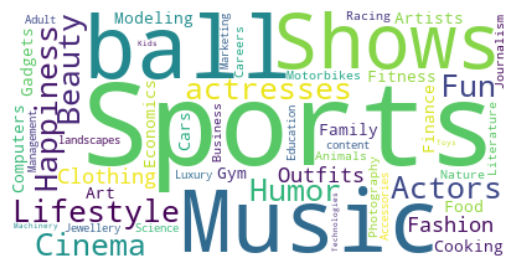

In [39]:
# Get the list of categories
categories = list(df['Category'].unique())

# # Create a string with all the categories separated by spaces
categories_text = ' '.join(categories)

# # Generate the wordcloud
wordcloud = WordCloud(background_color='white').generate(categories_text)

# # Display the wordcloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Authentic Engagement vs. Average Engagement

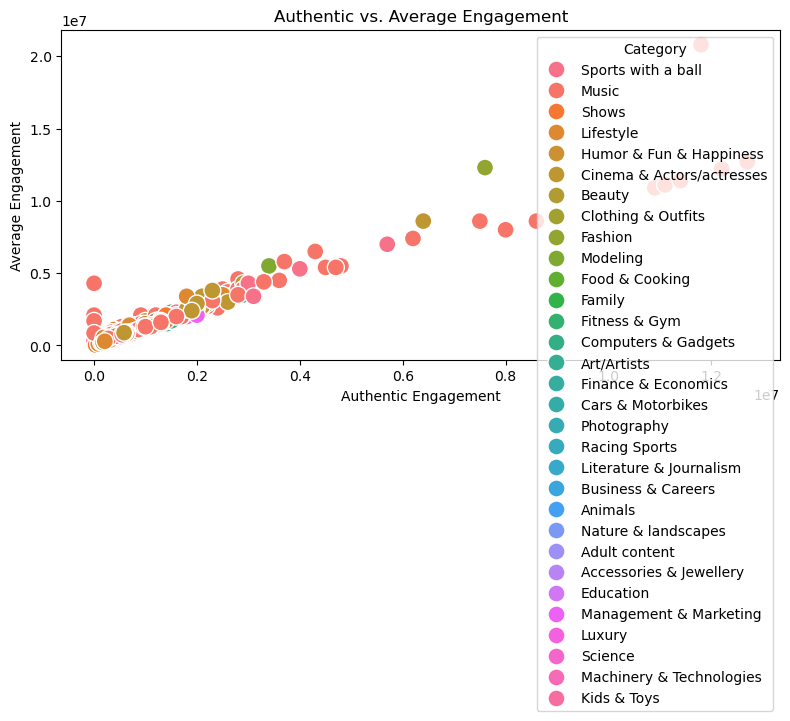

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Authentic engagement", y="Engagement average", hue="Category", data=df, s=150)
plt.title("Authentic vs. Average Engagement")
plt.xlabel("Authentic Engagement")
plt.ylabel("Average Engagement")
plt.tight_layout()
plt.show()

### Top 10 Categories by Followers Count

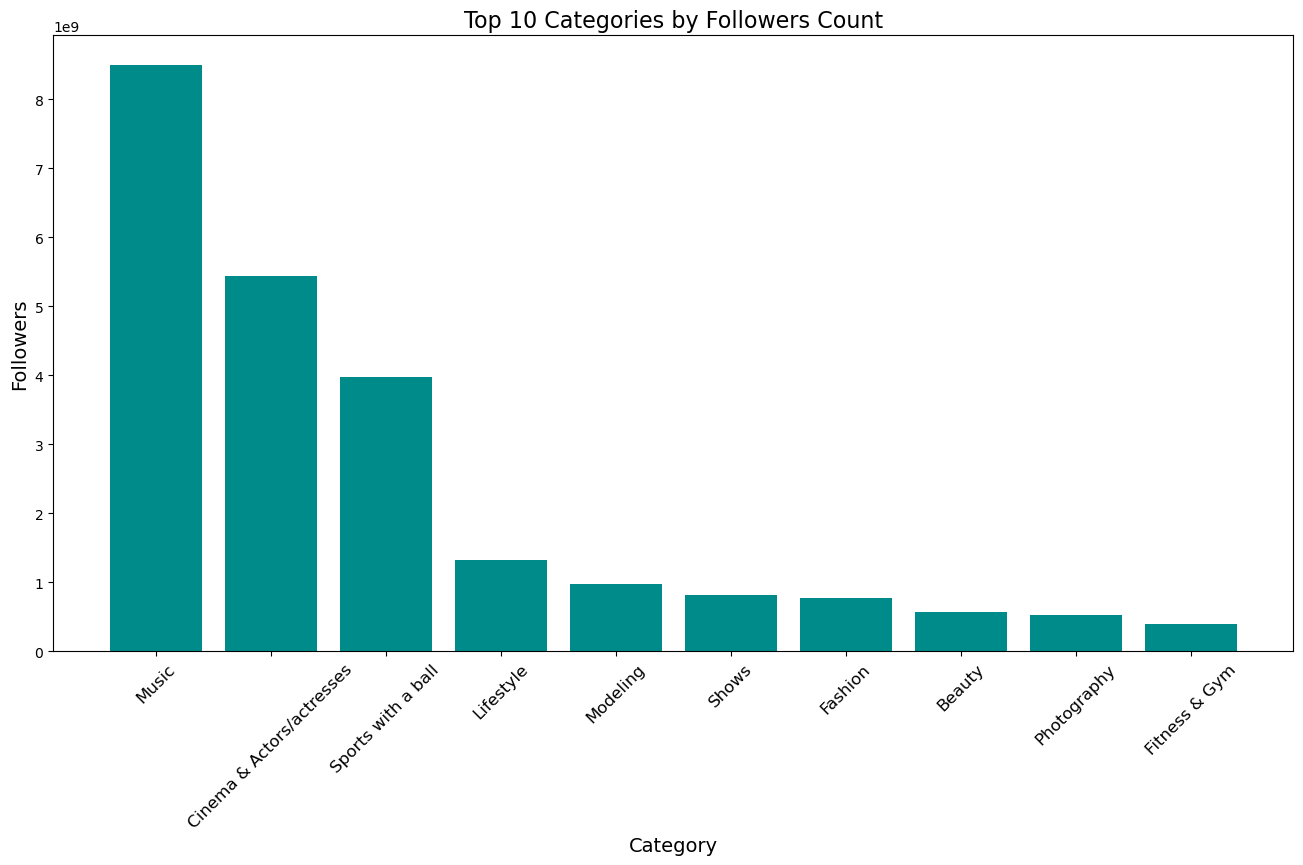

In [66]:
# Group the data
category_followers = df.groupby('Category')['Followers'].sum()

# Top 10
top_10 = category_followers.nlargest(10)

plt.figure(figsize=(16, 8))
plt.bar(top_10.index, top_10.values, color='darkcyan')
plt.title('Top 10 Categories by Followers Count', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Followers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

### Top 10 Audience Countries

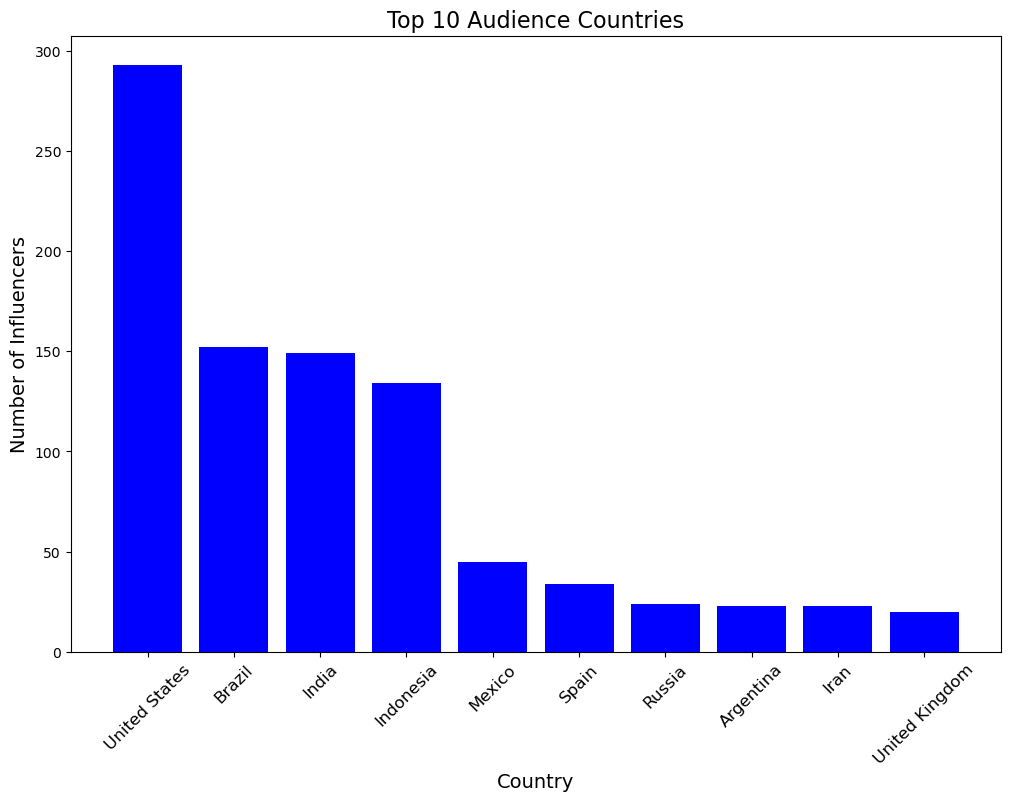

In [71]:
# Get the top 10 audience countries
top_10 = df['Top audience country'].value_counts().nlargest(10)

# Create a bar chart of the top 10 audience countries
plt.figure(figsize=(12, 8))
plt.bar(top_10.index, top_10.values, color='blue')
plt.title('Top 10 Audience Countries', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Number of Influencers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

C:\Users\CS\AppData\Local\Temp\ipykernel_10124\1148105475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Followers", y="Influencer insta name", data=df.head(10), palette="viridis")


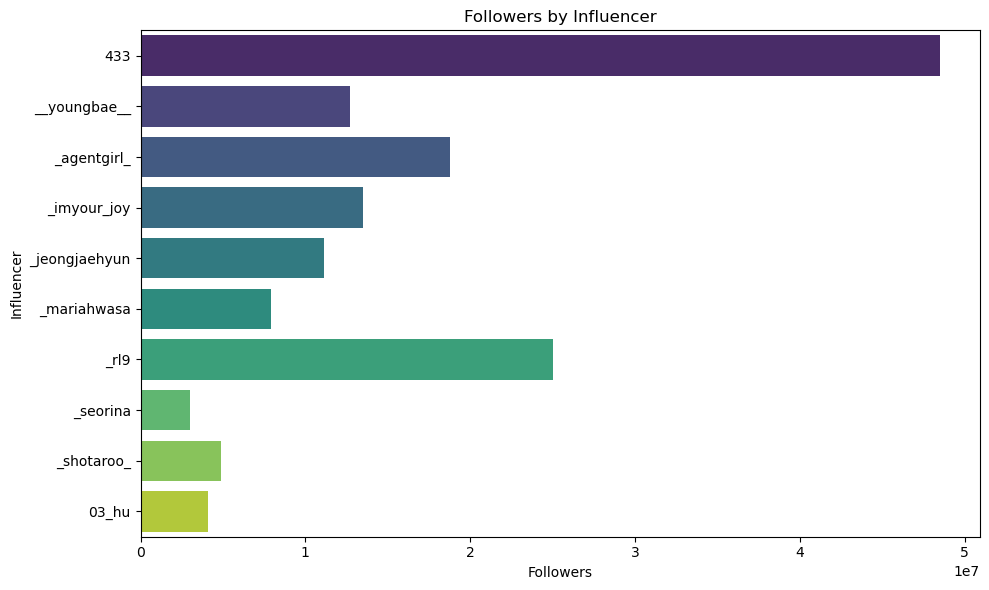

In [83]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Followers", y="Influencer insta name", data=df.head(10), palette="viridis")
plt.title("Followers by Influencer")
plt.xlabel("Followers")
plt.ylabel("Influencer")
plt.tight_layout()
plt.show()

### Top 10 Influencers by Followers Count

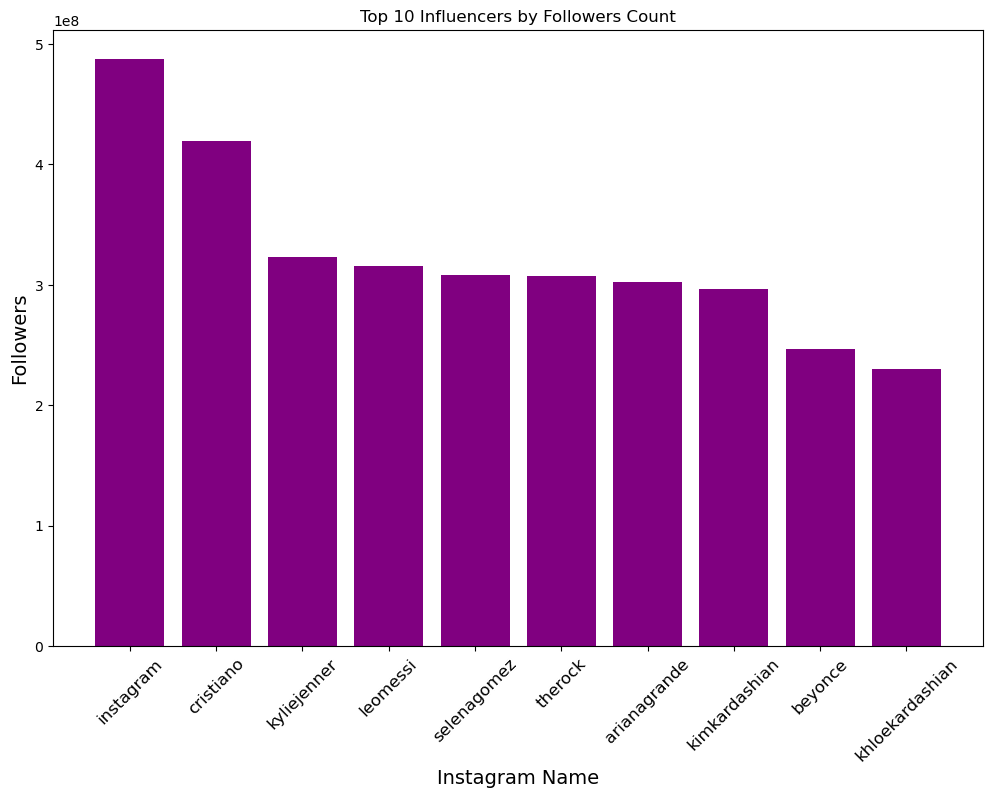

In [130]:
top_10 = df.nlargest(10, 'Followers')

# Create a bar chart of the top 10 influencers by followers
plt.figure(figsize=(12, 8))
plt.bar(top_10['Influencer insta name'], top_10['Followers'], color='purple')
plt.title('Top 10 Influencers by Followers Count')
plt.xlabel('Instagram Name', fontsize=14)
plt.ylabel('Followers', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

### Distribution of Influencer Categories

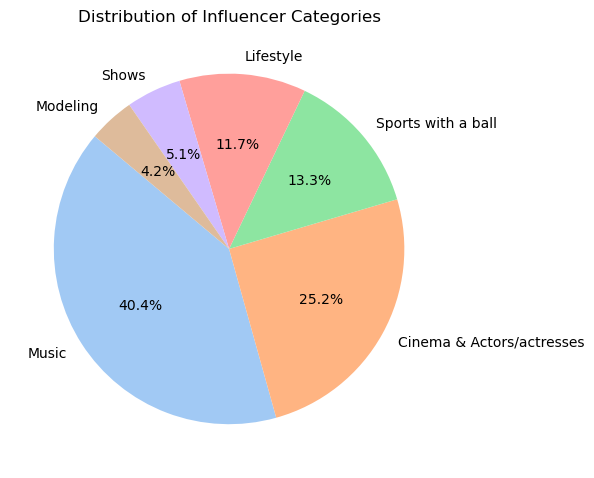

In [99]:
plt.figure(figsize=(6, 6))
df['Category'].value_counts().head(6).plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Distribution of Influencer Categories")
plt.ylabel("")
plt.tight_layout()
plt.show()

### Followers vs. Engagement Average

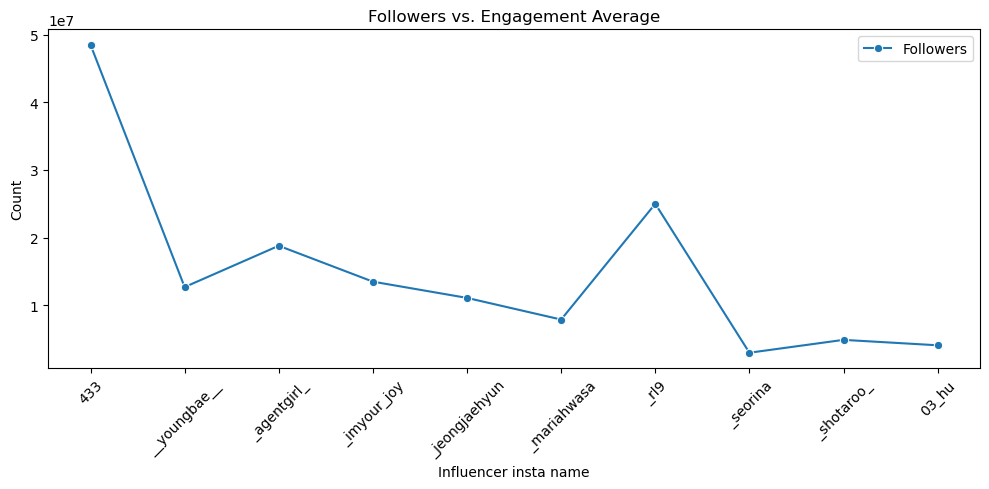

In [112]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Influencer insta name", y="Followers", data=df.head(10), marker='o', label='Followers')
plt.title("Followers vs. Engagement Average")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Engagement Average by Category

C:\Users\CS\AppData\Local\Temp\ipykernel_10124\2122332670.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Category", y="Engagement average", data=df.head(10), palette="Set2")


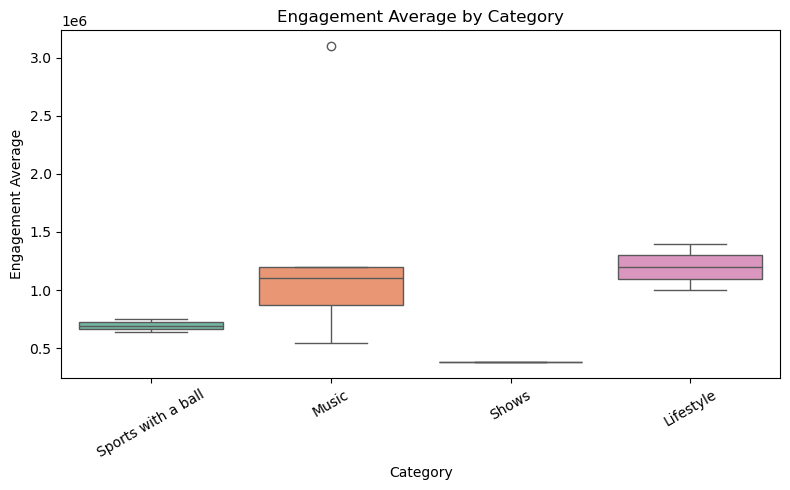

In [117]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Category", y="Engagement average", data=df.head(10), palette="Set2")
plt.title("Engagement Average by Category")
plt.ylabel("Engagement Average")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### Correlation Heatmap: Followers & Engagement

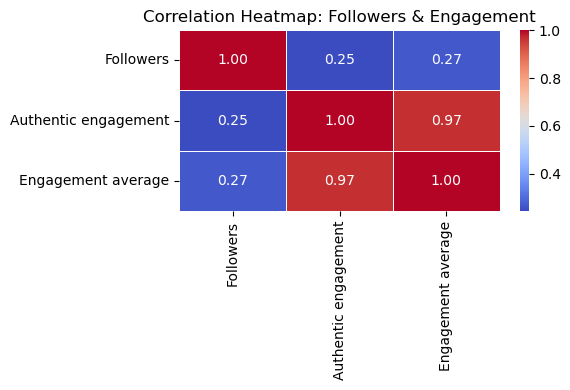

In [127]:
# Select only numeric columns
numeric_cols = df[["Followers", "Authentic engagement", "Engagement average"]]

#  correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap: Followers & Engagement")
plt.tight_layout()
plt.show()

In [132]:
# save the cleaned data
df.to_csv('cleaned_social media influencers - instagram.csv',index=False)